<a href="https://colab.research.google.com/github/Jbdpalle/AirbBnb-Data-Analyiss/blob/main/AirBnB_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# Data Importing and Cleaning

In [2]:
# Importing the Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
#Mounting the Drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Importing dataset
airbnb_data = pd.read_csv('/content/drive/MyDrive/CapStone Projects/Project 1/Copy of Airbnb NYC 2019.csv')


In [5]:
# Checking the shape of our dataset 

print(f"The shape of our dataset is {airbnb_data.shape}")

The shape of our dataset is (48895, 16)


In [6]:
# Checking the feature names of our dataset 
print(f"The names of the features in the dataset are:  \n{airbnb_data.columns}")


The names of the features in the dataset are:  
Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [7]:
# Checking the information in our dataset 
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
#Checking the first 5 rows of our dataset 
airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [10]:
#Checking for categorical columns
cat_cols = airbnb_data.select_dtypes(include = 'object').columns
print(f' The following are the categorical features in the dataset: {list(cat_cols)}')

 The following are the categorical features in the dataset: ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']


In [11]:
# Checking for numeric/ non categorical columns
num_cols = airbnb_data.select_dtypes(exclude = 'object').columns
print(' The following are the non categorical features in the dataset:') 
list(num_cols)

 The following are the non categorical features in the dataset:


['id',
 'host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [12]:
# Checking how many missing data points we have 
num_cols = airbnb_data.select_dtypes(exclude = 'object').columns
print(f" The following are non categorical / numerical columns in the dataset: {list(num_cols)}")

 The following are non categorical / numerical columns in the dataset: ['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [13]:
# get the number of missing data points per column
missing_values_count = airbnb_data.isnull().sum()

# look at the missing points in the first ten columns
missing_values_count[:]

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [14]:
# how many total missing values do we have?
total_cells = np.product(airbnb_data.shape)
print(total_cells)
total_missing = missing_values_count.sum()
print(total_missing)

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(round(percent_missing,2))

782320
20141
2.57



# **OBSERVATIONS**
Looking at the Missing or null values above. I can conclude that last_reviews and reviews_per_month have the most
missing values. These values may be missed because they may have not been written by customers and since these features
don't affect outcome. I will be dropping them out of the dataset, along with latitude and longitude.

# Figuring out why there is missing data. 

Looking at the Missing or null values above. I can conclude that last_reviews and reviews_per_month have the most
missing values. These values may be missed because they may have not been written by customers and since these features
don't affect outcome. I will be dropping them out of the dataset, along with latitude and longitude.

In [15]:
# Dropping the unncessary columns .
airbnb_new_data = airbnb_data.drop(['latitude', 'longitude','last_review','reviews_per_month'], axis =1)
airbnb_new_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


In [16]:
# CHECKING THE NEW DATASET WITH MISSING VALUES AND REMOVED COLUMNS
missing_values_count = airbnb_new_data.isnull().sum()

# look at the missing points in the first 5 columns
missing_values_count[:5]

id                      0
name                   16
host_id                 0
host_name              21
neighbourhood_group     0
dtype: int64

In [17]:
# Filling missing values in the above dataset. 
airbnb_new_data['name'].fillna('Unavailable', inplace = True)
airbnb_new_data['host_name'].fillna('Unavailable', inplace = True)

In [18]:
airbnb_new_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


In [19]:
# CHECKING FOR ANY MISSING VALUES IN THE NEW DATASET 

print(f"The number of missing values in the new data set are {airbnb_new_data.isnull().sum()}")

The number of missing values in the new data set are id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


#EXPLORING THE DATA AND ANSWER THE QUESTIONS AT THE START OF THE NOTEBOOK. 
 WHAT CAN WE LEARN ABOUT DIFFERENT HOSTS AND AREAS

In [20]:
host_listing_areas = airbnb_new_data.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
leading_hosts = host_listing_areas.sort_values(by = ['calculated_host_listings_count'], ascending = False).head(9)
leading_hosts

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,327
1833,Blueground,Brooklyn,232
1834,Blueground,Manhattan,232
7275,Kara,Manhattan,121
7480,Kazuya,Queens,103
7479,Kazuya,Manhattan,103
7478,Kazuya,Brooklyn,103
6540,Jeremy & Laura,Manhattan,96
13216,Sonder,Manhattan,96


# Observation: FROM THE ABOVE RESULT. WE CAN SEE THAT Host_name 

SONDER(NYC) has 327 listings in Manhattan 

BLUEGROUND has 232 listings in Manhattan and 232 listings in Brooklyn

# Data Visualisation: 

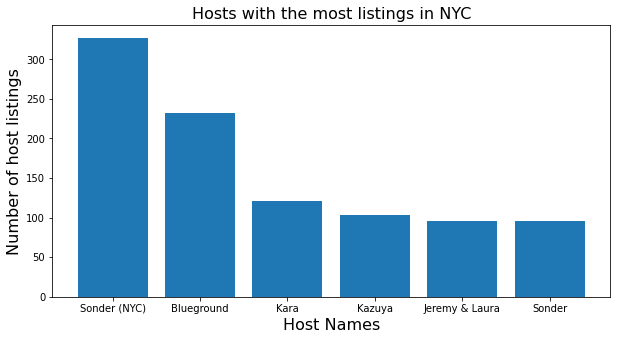

In [22]:
#Hosts with the most Listings.
plt.rcParams['figure.figsize'] = (10,5)
host_name = leading_hosts['host_name']
host_listing = leading_hosts['calculated_host_listings_count']
plt.bar(host_name, host_listing)
plt.title('Hosts with the most listings in NYC', {'fontsize': 16})
plt.xlabel('Host Names', {'fontsize': 16})
plt.ylabel('Number of host listings', {'fontsize':16})
plt.show()